In [1]:
import numpy as np
import matplotlib .pyplot as plt
#%%
# import data
data = np. genfromtxt ('polyreg.csv',delimiter =',')
X = data [: ,0]. reshape (-1,1)
y = data [: ,1]. reshape (-1,1)
# Network setup
p = [X.shape [1] ,20 ,20 ,1] # size of layers
L = len(p) -1 

In [2]:
def initialize (p, w_sig = 1):
    W, b = [[]]*len(p), [[]]*len(p)
    for l in range(1,len(p)):
        W[l]= w_sig * np.random.randn(p[l], p[l -1])
        b[l]= w_sig * np.random.randn(p[l], 1)
    return W,b
W,b = initialize (p) 

In [3]:
def RELU(z,l): # RELU activation function: value and derivative
    if l == L: return z, np. ones_like (z)
    else:
        val = np.maximum (0,z) # RELU function element -wise
        J = np.array(z>0, dtype = float) # derivative of RELU
        return val , J
def loss_fn(y,g):
    return (g - y)**2, 2 * (g - y)
S = RELU

In [4]:
def feedforward (x,W,b):
    a, z, gr_S = [0]*(L+1) , [0]*(L+1) , [0]*(L+1)
    a[0] = x.reshape (-1,1)
    for l in range(1,L+1):
        z[l] = W[l] @ a[l -1] + b[l] # affine transformation
        a[l], gr_S[l] = S(z[l],l) # activation function
    return a, z, gr_S

In [5]:
def backward(W,b,X,y):
    n =len(y)
    delta = [0]*(L+1)
    dC_db , dC_dW = [0]*(L+1) , [0]*(L+1)
    loss =0
    for i in range(n): # loop over training examples
        a, z, gr_S = feedforward (X[i ,:].T, W, b)
        cost , gr_C = loss_fn(y[i], a[L]) # cost i and gradient wrt g
        loss += cost/n
        delta[L] = gr_S[L] @ gr_C
        for l in range(L,0,-1): # l = L,... ,1
            dCi_dbl = delta[l]
            dCi_dWl = delta[l] @ a[l -1].T
            # ---- sum up over samples ----
            dC_db[l] = dC_db[l] + dCi_dbl/n
            dC_dW[l] = dC_dW[l] + dCi_dWl/n
            # -----------------------------
            delta[l -1] = gr_S[l -1] * W[l].T @ delta[l]
    return dC_dW , dC_db , loss

In [6]:
def list2vec(W,b):
# converts list of weight matrices and bias vectors into
# one column vector
    b_stack = np.vstack (list([b[i] for i in range(1,len(b))] ))
    W_stack = np.vstack(list(W[i]. flatten ().reshape (-1,1) for i in range
    (1,len(W))))
    vec = np.vstack (list([ b_stack , W_stack ]))
    return vec

In [7]:
def vec2list(vec , p):
# converts vector to weight matrices and bias vectors
    W, b = [[]]*len(p) ,[[]]*len(p)
    p_count = 0
    for l in range(1,len(p)): # construct bias vectors
        b[l] = vec[p_count :( p_count+p[l])]. reshape (-1,1)
        p_count = p_count + p[l]
    for l in range(1,len(p)): # construct weight matrices
        W[l] = vec[p_count :( p_count + p[l]*p[l -1]) ]. reshape(p[l], p[
        l -1])
        p_count = p_count + (p[l]*p[l -1])
    return W, b

epoch | batch loss
----------------------------
1 :  299.4975413714694
1000 :  15.112632057442932
2000 :  29.550869363082874
3000 :  22.203283742989093
4000 :  19.273124055552046
5000 :  23.462581372246927
6000 :  21.88436583514926
7000 :  34.180176274138454
8000 :  35.6977182496288
9000 :  24.9500496446498
10000 :  29.565520235404552
entire training set loss =  28.751843284235488


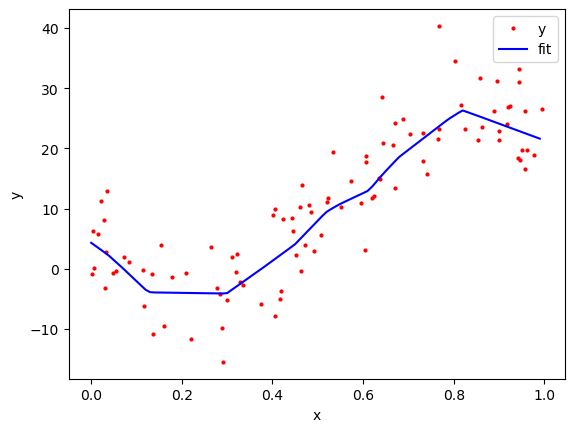

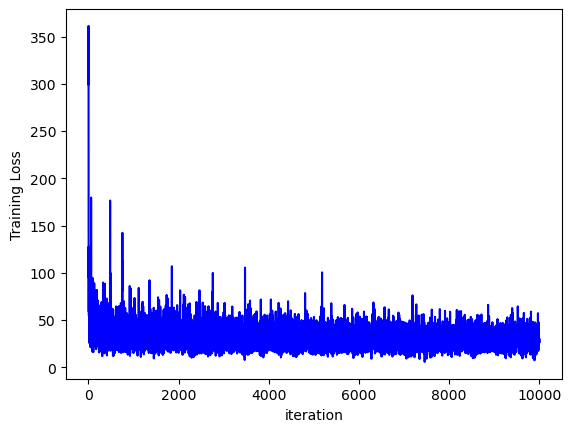

In [8]:
batch_size = 20
lr = 0.005
beta = list2vec (W,b)
loss_arr = []
n = len(X)
num_epochs = 10000
print("epoch | batch loss")
print("----------------------------")
for epoch in range(1, num_epochs +1):
    batch_idx = np.random.choice(n, batch_size )
    batch_X = X[ batch_idx ]. reshape (-1,1)
    batch_y=y[ batch_idx ]. reshape (-1,1)
    dC_dW , dC_db , loss = backward(W,b,batch_X ,batch_y)
    d_beta = list2vec(dC_dW ,dC_db)
    loss_arr.append(loss.flatten () [0])
    if(epoch ==1 or np.mod(epoch ,1000) ==0):
        print(epoch ,": ",loss.flatten () [0])
    beta = beta - lr*d_beta
    W,b = vec2list (beta ,p)
dC_dW , dC_db , loss = backward(W,b,X,y)
print("entire training set loss = ",loss.flatten () [0])
xx = np.arange (0 ,1 ,0.01)
y_preds = np. zeros_like (xx)
for i in range(len(xx)):
    a, _, _ = feedforward (xx[i],W,b)
    y_preds[i], = a[L]
plt.plot(X,y, 'r.', markersize = 4,label = 'y')
plt.plot(np.array(xx), y_preds , 'b',label = 'fit')
plt.legend ()
plt.xlabel('x')
plt.ylabel('y')
plt.show ()
plt.plot(np.array(loss_arr), 'b')
plt.xlabel('iteration')
plt.ylabel('Training Loss')
plt.show ()